In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [77]:
df = pd.read_csv('../writes/normalizedpropdata.csv')
print(df)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3280)

       Unnamed: 0  IsWR  IsKR  IsCN  IsEUW  IsNA  IsPCS  IsVN  IsJP  IsBR  \
0               0     0     0     0      0     0      0     0     0     1   
1               1     0     1     0      0     0      0     0     0     0   
2               2     0     0     0      0     0      0     0     0     0   
3               3     0     0     0      0     0      0     0     0     0   
4               4     1     0     0      0     0      0     0     0     0   
...           ...   ...   ...   ...    ...   ...    ...   ...   ...   ...   
35203       35203     0     0     0      0     0      0     0     0     0   
35204       35204     0     0     0      0     0      0     0     0     0   
35205       35205     0     0     0      0     0      0     0     0     0   
35206       35206     0     0     0      0     0      0     0     0     0   
35207       35207     0     0     0      0     0      0     0     0     0   

       ...  T2_P4_DPM  T2_P4_SoloKills  T2_P5_WinRate  T2_P5_KDA  T2_P5_CSP

In [78]:
from sklearn.linear_model import LogisticRegression
import joblib

model = LogisticRegression(max_iter=2500, random_state=42, verbose=1)
model.fit(X_train, y_train)
joblib.dump(model, 'logistic_regression_model.pkl')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          108     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  3.42745D+02


 This problem is unconstrained.



At iterate   50    f=  5.67013D-01    |proj g|=  9.51298D-01

At iterate  100    f=  5.59279D-01    |proj g|=  1.25783D+01

At iterate  150    f=  5.54404D-01    |proj g|=  4.76255D-02

At iterate  200    f=  5.54109D-01    |proj g|=  6.09412D-01

At iterate  250    f=  5.53052D-01    |proj g|=  1.45402D+00

At iterate  300    f=  5.52357D-01    |proj g|=  4.67019D-02

At iterate  350    f=  5.51041D-01    |proj g|=  1.37418D+00

At iterate  400    f=  5.50743D-01    |proj g|=  4.45803D+01

At iterate  450    f=  5.50048D-01    |proj g|=  8.29670D-01

At iterate  500    f=  5.50036D-01    |proj g|=  1.99900D-01

At iterate  550    f=  5.50034D-01    |proj g|=  3.17845D-02

At iterate  600    f=  5.49675D-01    |proj g|=  8.29403D-01

At iterate  650    f=  5.49675D-01    |proj g|=  2.82403D-01

At iterate  700    f=  5.49654D-01    |proj g|=  1.41449D+01

At iterate  750    f=  5.49277D-01    |proj g|=  3.21671D+01

At iterate  800    f=  5.49212D-01    |proj g|=  1.53456D-02

At iter

/Users/johnliu/Documents/vscode-workspace/lol-rivalry/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.pkl']

In [79]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7179778472024992
Confusion Matrix:
[[2524 1052]
 [ 934 2532]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      3576
           1       0.71      0.73      0.72      3466

    accuracy                           0.72      7042
   macro avg       0.72      0.72      0.72      7042
weighted avg       0.72      0.72      0.72      7042



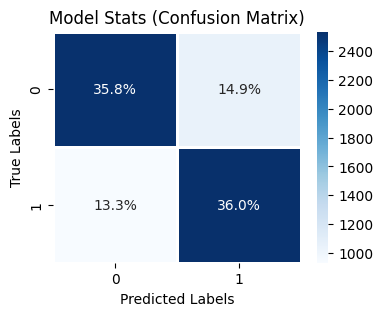

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', linewidth=1., cmap='Blues', 
                 xticklabels=model.classes_, yticklabels=model.classes_)
total = 0
for t in ax.texts: total += float(t.get_text())
for t in ax.texts: t.set_text(f"{round(100 * float(t.get_text())/total, 1)}%")
plt.title(f'Model Stats (Confusion Matrix)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()